<a href="https://colab.research.google.com/github/Collinsagyekum/Datacamp-Courses/blob/master/Twitter_US_Airline_Sentiment_Problem_Statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

# Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

# Dataset:

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone
 

# Objective:

To implement the techniques learned as a part of the course.


##Learning Outcomes:

- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model

# Import all relevant libraries

In [119]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')    #download stopwords
nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

# !pip install vaderSentiment    # Install vader sentiment package
# !pip install textblob   # Install textblob package

# install and import necessary libraries.

# !pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
# import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [120]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
df = pd.read_csv("/content/drive/MyDrive/Greatlearning/Tweets.csv")
np.random.seed(2) # To get the same random results every time
df.sample(n=10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8917,567750136223518720,positive,1.0000,NaN,NaN,Delta,NaN,amyfame,NaN,0,@JetBlue Thank you!,NaN,2015-02-17 10:19:15 -0800,NaN,Eastern Time (US & Canada)
9534,569888646633017344,negative,1.0000,Late Flight,1.0000,US Airways,NaN,Tasil2005,NaN,0,@USAirways What is going on with flight 1826 f...,NaN,2015-02-23 07:56:56 -0800,NaN,NaN
12875,569993908324663296,neutral,0.6654,NaN,NaN,American,NaN,kiasuchick,NaN,0,"@AmericanAir Yes, thanks I found those, didn't...",NaN,2015-02-23 14:55:12 -0800,"Los Angeles, CA",Pacific Time (US & Canada)
4601,569988842335244289,positive,1.0000,NaN,NaN,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir Big kudos to your staff today at...,NaN,2015-02-23 14:35:04 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
4308,567714192980201472,negative,1.0000,longlines,0.3469,United,NaN,lauralscott,NaN,0,@united last night we waited forever at the ga...,"[0.0, 0.0]",2015-02-17 07:56:25 -0800,"ÜT: 40.976702,-72.210688",Quito
10981,568640966866935808,negative,1.0000,Late Flight,1.0000,US Airways,NaN,lj_verde,NaN,0,@USAirways Why were we loaded onto the plane (...,NaN,2015-02-19 21:19:05 -0800,DC,Eastern Time (US & Canada)
11037,568594646168948736,negative,1.0000,Can't Tell,0.6635,US Airways,NaN,Danlarsonmpls,NaN,0,@USAirways thank you for continuing to be the ...,NaN,2015-02-19 18:15:02 -0800,Twin Cities,NaN
12991,569966076047437824,neutral,0.6421,NaN,0.0000,American,NaN,flemmingerin,NaN,0,@AmericanAir Thanks for doing that but now it'...,NaN,2015-02-23 13:04:36 -0800,San Diego,NaN
5685,568807908374286336,positive,1.0000,NaN,NaN,Southwest,NaN,itsjessme_,NaN,0,@SouthwestAir oh my gosh! Going to dm you now!...,NaN,2015-02-20 08:22:27 -0800,NaN,Alaska
5784,568605955614642176,positive,1.0000,NaN,NaN,Southwest,NaN,MattChrisEd,NaN,0,"@SouthwestAir appreciate the reply, hopefully ...",NaN,2015-02-19 18:59:58 -0800,City of Angels,Pacific Time (US & Canada)


In [122]:
df.shape

(14640, 15)

In [123]:
df.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [124]:
#describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [125]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

- Several fields including 'negativereason', 'negativereason_confidence', 'airline_sentiment_gold', 'negativereason_gold','tweet_coord', 'tweet_location' and 'user_timezone' have missing values 

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [127]:
#Converting the data type of categorical features to 'category'
for feature in df.columns:
  if df[feature].dtype == 'object':
    df[feature] = pd.Categorical(df[feature])

In [128]:
for i in df.describe(include=["category"]).columns:
  print("Unique values in", i, "are :")
  print(df[i].value_counts())
  print("*" * 50)

Unique values in airline_sentiment are :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
**************************************************
Unique values in negativereason are :
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64
**************************************************
Unique values in airline are :
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
**************************************************
Unique values in airline_sentiment_gold are :
negative    32
positive     5
neutral    

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   tweet_id                      14640 non-null  int64   
 1   airline_sentiment             14640 non-null  category
 2   airline_sentiment_confidence  14640 non-null  float64 
 3   negativereason                9178 non-null   category
 4   negativereason_confidence     10522 non-null  float64 
 5   airline                       14640 non-null  category
 6   airline_sentiment_gold        40 non-null     category
 7   name                          14640 non-null  category
 8   negativereason_gold           32 non-null     category
 9   retweet_count                 14640 non-null  int64   
 10  text                          14640 non-null  category
 11  tweet_coord                   1019 non-null   category
 12  tweet_created                 14640 non-null  

# Exploratory Data Analysis

## Word Cloud for Negative Reviews

In [130]:
from wordcloud import WordCloud, STOPWORDS

In [131]:
negative_reviews = df[df['airline_sentiment']== 'negative']
words = ' '.join(negative_reviews['negativereason'])
cleaned_word = " ".join([word for word in words.split()])

In [132]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                      ).generate(cleaned_word)

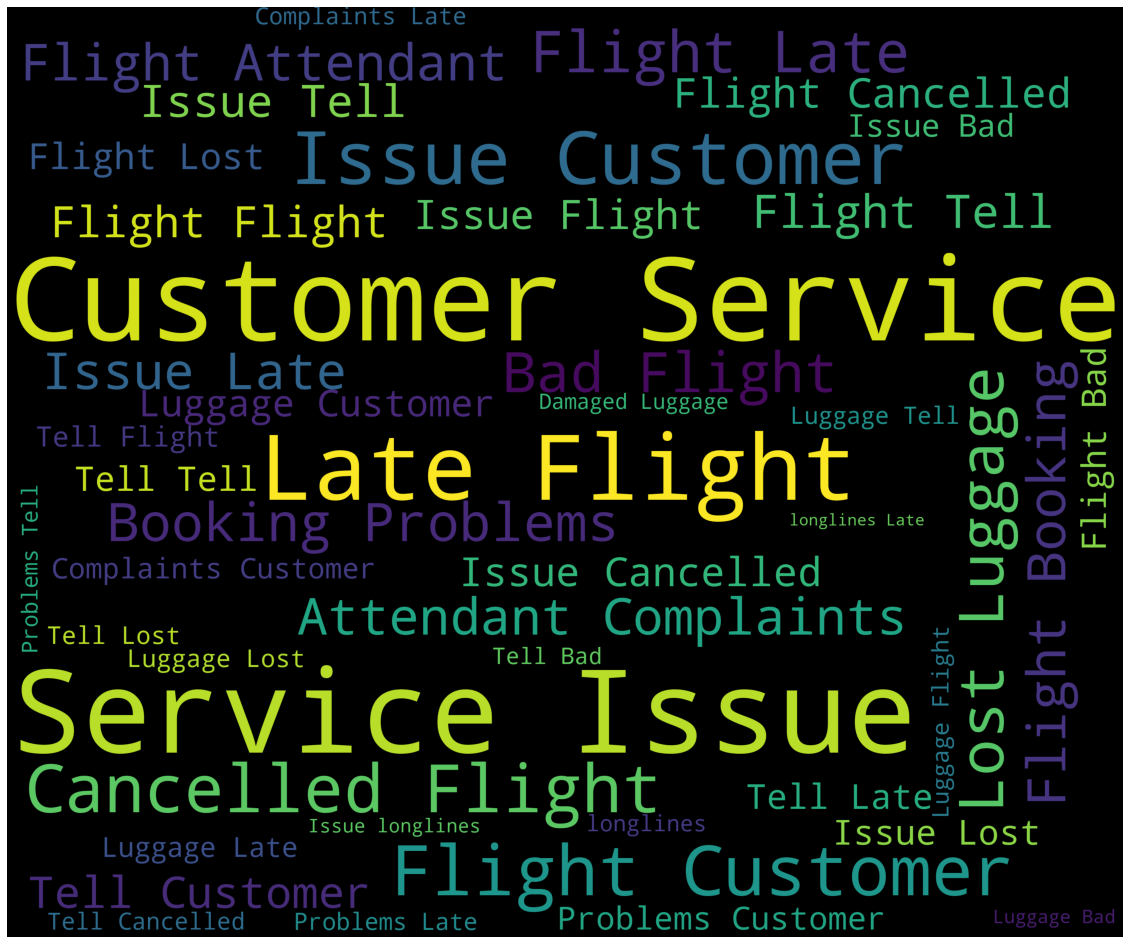

In [133]:
plt.figure(1,figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- Service Issue, Booking problems, flight customer, bad flight lostt luggage, problems customer, Issue Customer were some of the important recurring words observed in the negative reviews

In [134]:
positve_reviews = df[df['airline_sentiment']== 'positive']
words = ' '.join(positve_reviews['text'])
cleaned_word = " ".join([word for word in words.split()])

In [135]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                      ).generate(cleaned_word)

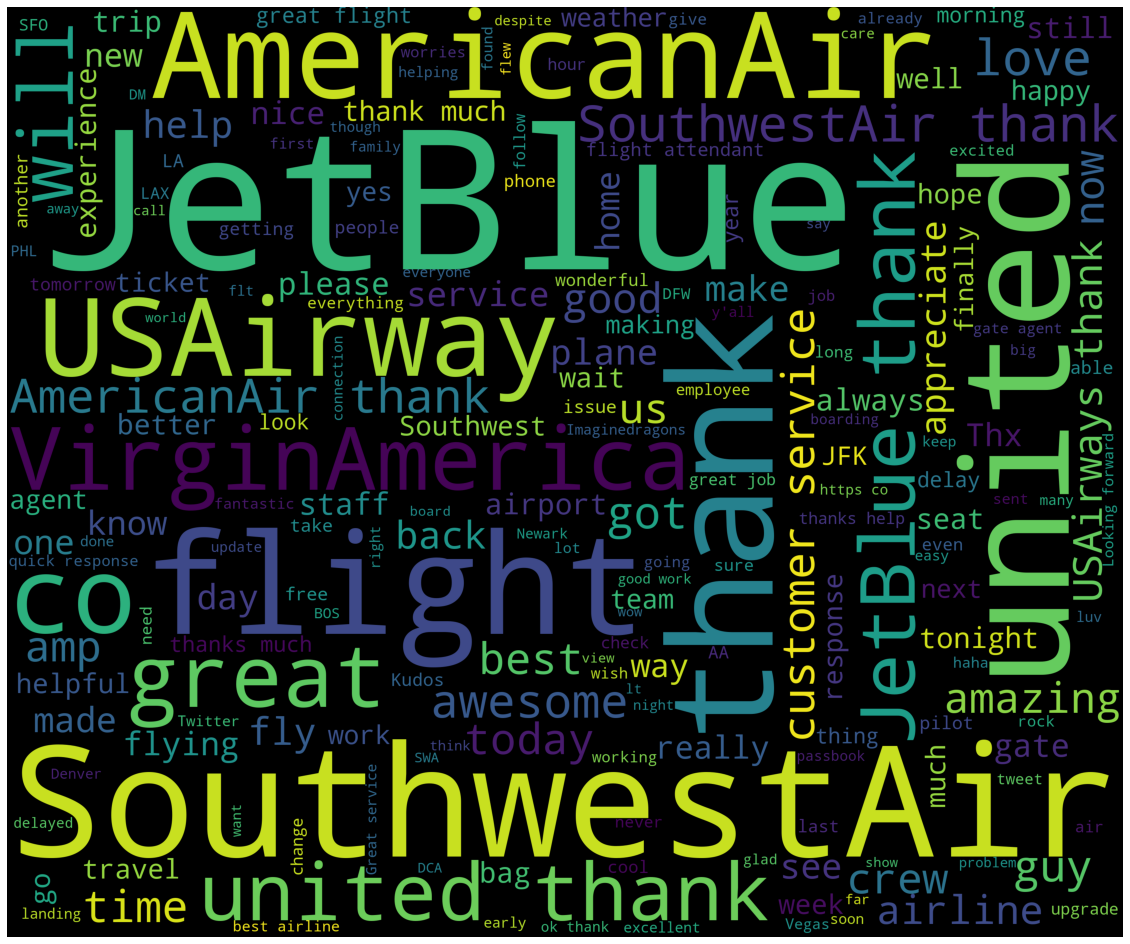

In [136]:
plt.figure(1,figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- Even though there are noise in the text field that must be cleaned and rechecked; **thank, amazing, jetblue, united, great** were some of the important recurring words observed in the positive sentiments

In [137]:
df['airline_sentiment'].unique()   #check the labels

['neutral', 'positive', 'negative']
Categories (3, object): ['neutral', 'positive', 'negative']

In [138]:
df['airline_sentiment'].value_counts() # check the count of each labels

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

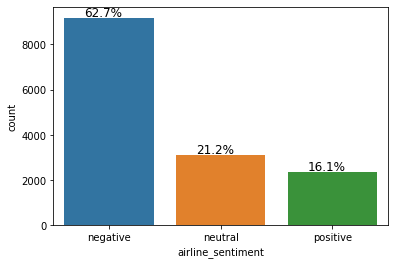

In [139]:
#plot the distribution of the class label
def bar_plot(data, feature):
    plot = sns.countplot(x =feature, data = data)
    total = len(data)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")
    plt.show()
    
bar_plot(df,'airline_sentiment')

- About Two third of the tweets were negative 

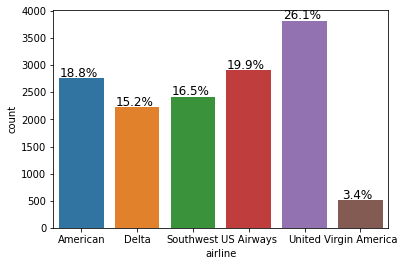

In [140]:
bar_plot(df,'airline')

- Most of the customers flew united, followed by US airways and American

In [141]:
# drop all columns except text and airline_sentiment
df = df[["text", "airline_sentiment"]]

# Data Pre-processing


- Tokenizing the tweet 
- Lower the tweets
- Remove numbers
- Remove Stopwords
- Lemmatized data
- Removing puntuations
- We have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

In [142]:
def clean_the_tweet(text):
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

                 

def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [143]:
# removing neutral tweets
df = df[df['airline_sentiment']!='neutral']
df['cleaned_tweet'] = df['text'].apply(clean_the_tweet)

In [144]:
df.head()
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)
df.head()

,text,airline_sentiment,cleaned_tweet
1,@VirginAmerica plus you've added commercials t...,1,you ve added commercials to the experience tacky
3,@VirginAmerica it's really aggressive to blast...,0,s really aggressive to blast obnoxious enterta...
4,@VirginAmerica and it's a really big bad thing...,0,it s a really big bad thing about it
5,@VirginAmerica seriously would pay $30 a fligh...,0,would pay a flight for seats that didn t have ...
6,"@VirginAmerica yes, nearly every time I fly VX...",1,nearly every time i fly vx this ear worm won t...


In [145]:
# Cleaning the tweets, removing punctuation marks
df['cleaned_tweet'] = df['cleaned_tweet'].apply(text_process)
df.reset_index(drop=True, inplace = True)
df.head()

,text,airline_sentiment,cleaned_tweet
0,@VirginAmerica plus you've added commercials t...,1,added commercials experience tacky
1,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...
2,@VirginAmerica and it's a really big bad thing...,0,really big bad thing
3,@VirginAmerica seriously would pay $30 a fligh...,0,would pay flight seats playing really bad thin...
4,"@VirginAmerica yes, nearly every time I fly VX...",1,nearly every time fly vx ear worm go away


## Re-build the positive tweet word cloud

In [150]:
positve_reviews = df[df['airline_sentiment']== 1]
words = ' '.join(positve_reviews['cleaned_tweet'])
cleaned_word = " ".join([word for word in words.split()])

In [151]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                      ).generate(cleaned_word)

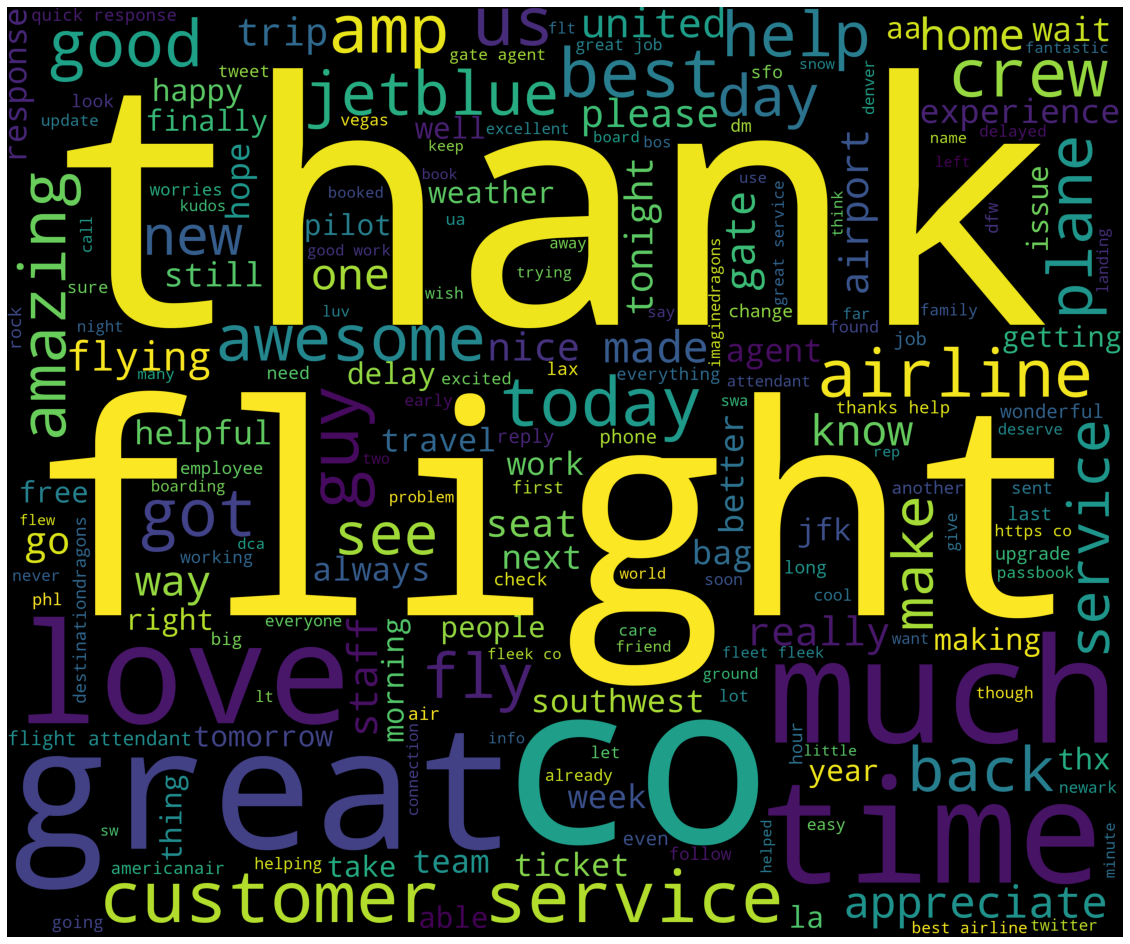

In [152]:
plt.figure(1,figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- **flight, thank, great, love, customer service, appreciate, good, happy,awesome ** were some of the important recurring words observed in the positive tweets

In [146]:
df['airline_sentiment'].unique()

array([1, 0])

# Supervised Learning for Sentiment Analysis

##Bag of Words (CountVectorizer)
In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are d unique words in our dictionary then for every review the vector will be of length d and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.

In [153]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(df['cleaned_tweet'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [154]:
data_features.shape       #Shape of the feature vector

(11541, 500)

In [155]:
X = data_features
y = df.airline_sentiment	

In [156]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [157]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [158]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

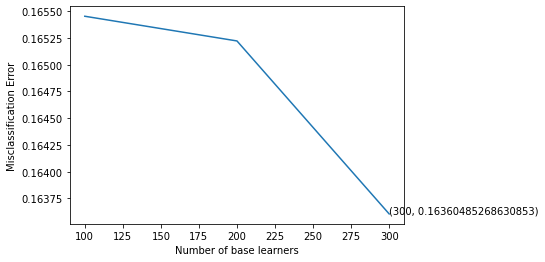

In [159]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [160]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['0' , '1']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2461
           1       0.58      0.67      0.62       425

    accuracy                           0.88      2886
   macro avg       0.76      0.79      0.77      2886
weighted avg       0.89      0.88      0.88      2886

Accuracy of the model is :  0.8801108801108801


[[2257  204]
 [ 142  283]]


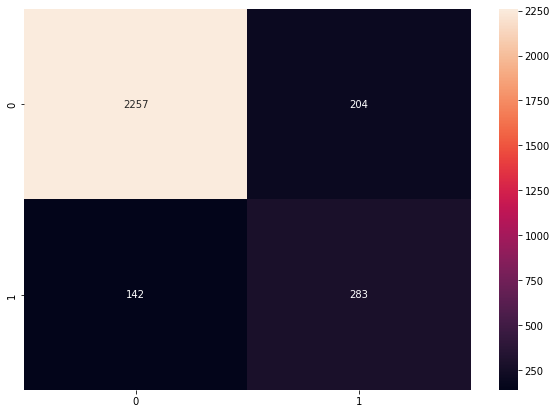

In [161]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thank,thanks,great,love,awesome,best,amazing,flight,much,hours,hold,appreciate,delayed,good,hour,get,cancelled,service,time,co,us,customer,bag,help,guys,one,plane,gate,know,like,fly,still,would,amp,http,worst,airline,jetblue,flights,got,
 
 


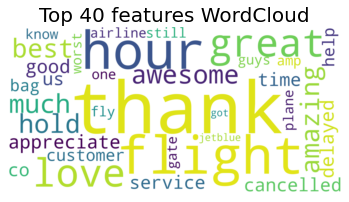

In [162]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

#TF-IDF
- Term Frequency - Inverse Document Frequency: It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [163]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(df['cleaned_tweet'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(11541, 500)

In [164]:
X = data_features
y = df.airline_sentiment

In [165]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [166]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [167]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

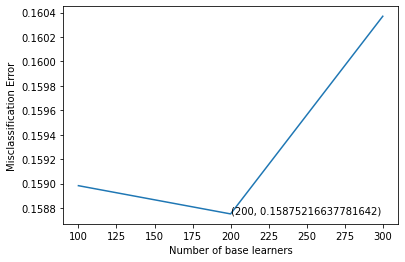

In [168]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [169]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['0' , '1']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2461
           1       0.62      0.60      0.61       425

    accuracy                           0.89      2886
   macro avg       0.78      0.77      0.77      2886
weighted avg       0.89      0.89      0.89      2886

Accuracy of the model is :  0.8866943866943867


[[2304  157]
 [ 170  255]]


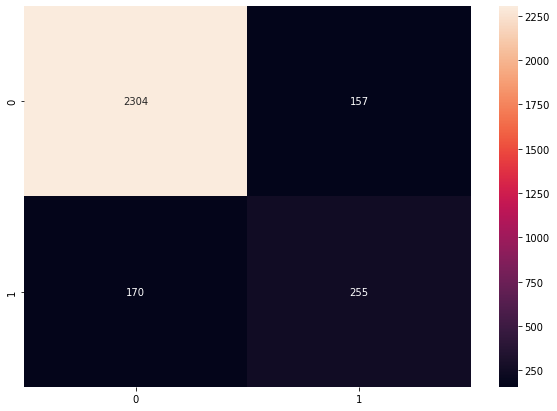

In [170]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thanks, thank, great, love, awesome, co, best, flight, amazing, much, http, appreciate, good, hold, hours, time, guys, get, service, fly, airline, made, jetblue, like, cancelled, customer, hour, help, quick, delayed, know, us, plane, got, well, see, gate, thx, still, crew, 
 
 


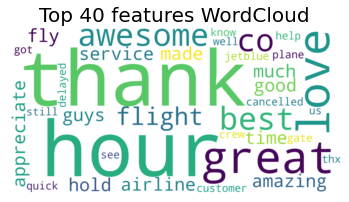

In [171]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()


#Comparing the accuracies of Supervised Learning methods i.e Count Vectorizer and TF-IDF

In [172]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
data = pd.DataFrame(y_test.tolist(),columns =['y_test'])
data['count_vectorizer_predicted'] = count_vectorizer_predicted
data['tf_idf_predicted'] = tf_idf_predicted
data.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,1


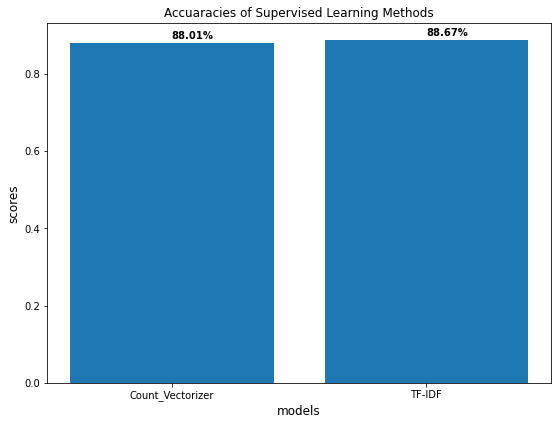

In [173]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()


- TF-IDF shows a better performance than Count Vectorizer, because it does not only focuse on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.
- Unsupervised Learning methods for Sentiment Analysis
##VADER
- VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool. VADER not only tells us about the Positivity and Negativity score, but also tells us how positive or negative a sentiment is.

In [174]:
import nltk
#download vader lexicon
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [175]:
data_new = df.copy()

In [176]:
data_new.head()

,text,airline_sentiment,cleaned_tweet
0,@VirginAmerica plus you've added commercials t...,1,added commercials experience tacky
1,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...
2,@VirginAmerica and it's a really big bad thing...,0,really big bad thing
3,@VirginAmerica seriously would pay $30 a fligh...,0,would pay flight seats playing really bad thin...
4,"@VirginAmerica yes, nearly every time I fly VX...",1,nearly every time fly vx ear worm go away


In [177]:
#Calculate the polarity score of the tweets
data_new['scores'] = data_new['cleaned_tweet'].apply(lambda cleaned_tweet: sentiment.polarity_scores(cleaned_tweet))
data_new.head()

,text,airline_sentiment,cleaned_tweet,scores
0,@VirginAmerica plus you've added commercials t...,1,added commercials experience tacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co..."
2,@VirginAmerica and it's a really big bad thing...,0,really big bad thing,"{'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'comp..."
3,@VirginAmerica seriously would pay $30 a fligh...,0,would pay flight seats playing really bad thin...,"{'neg': 0.371, 'neu': 0.5, 'pos': 0.129, 'comp..."
4,"@VirginAmerica yes, nearly every time I fly VX...",1,nearly every time fly vx ear worm go away,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [178]:
#Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])
data_new.head()

,text,airline_sentiment,cleaned_tweet,scores,compound
0,@VirginAmerica plus you've added commercials t...,1,added commercials experience tacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co...",-0.3306
2,@VirginAmerica and it's a really big bad thing...,0,really big bad thing,"{'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'comp...",-0.5829
3,@VirginAmerica seriously would pay $30 a fligh...,0,would pay flight seats playing really bad thin...,"{'neg': 0.371, 'neu': 0.5, 'pos': 0.129, 'comp...",-0.5256
4,"@VirginAmerica yes, nearly every time I fly VX...",1,nearly every time fly vx ear worm go away,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [179]:
#Classify the class of the review by keeping threshold on the compund score
data_new['comp_score'] = data_new['compound'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,text,airline_sentiment,cleaned_tweet,scores,compound,comp_score
0,@VirginAmerica plus you've added commercials t...,1,added commercials experience tacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
1,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co...",-0.3306,0
2,@VirginAmerica and it's a really big bad thing...,0,really big bad thing,"{'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'comp...",-0.5829,0
3,@VirginAmerica seriously would pay $30 a fligh...,0,would pay flight seats playing really bad thin...,"{'neg': 0.371, 'neu': 0.5, 'pos': 0.129, 'comp...",-0.5256,0
4,"@VirginAmerica yes, nearly every time I fly VX...",1,nearly every time fly vx ear worm go away,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1


In [180]:
df["VADER_pred"] = data_new['comp_score'].tolist()
df.head()

,text,airline_sentiment,cleaned_tweet,VADER_pred
0,@VirginAmerica plus you've added commercials t...,1,added commercials experience tacky,1
1,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...,0
2,@VirginAmerica and it's a really big bad thing...,0,really big bad thing,0
3,@VirginAmerica seriously would pay $30 a fligh...,0,would pay flight seats playing really bad thin...,0
4,"@VirginAmerica yes, nearly every time I fly VX...",1,nearly every time fly vx ear worm go away,1


In [181]:
#Calculate the accuracy of the Vader Sentiment Analysis
df["airline_sentiment"] = df["airline_sentiment"].astype(int)   #convert the sentiment column values into int data type
df["VADER_pred"] = df["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type
print("Accuaracy using Vader airline_sentiment Analysis is : ",
      accuracy_score(df["airline_sentiment"].tolist(),df["VADER_pred"].tolist()))

Accuaracy using Vader airline_sentiment Analysis is :  0.5438870115241313


[[4018 5160]
 [ 104 2259]]


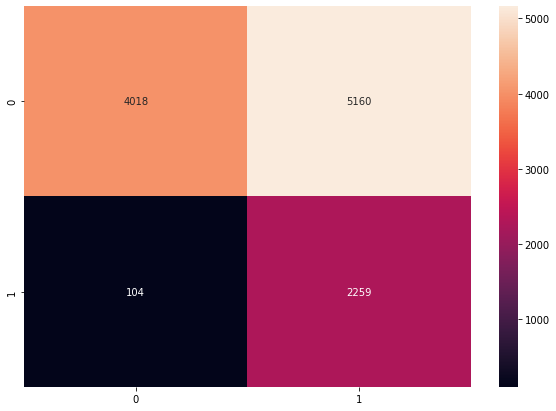

In [183]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(df["airline_sentiment"].tolist(), df['VADER_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#With the help of the TextBlob.sentiment() method, we can get the sentiments of the sentences by using TextBlob.sentiment() method.

##TextBlob

In [184]:
from textblob import TextBlob

In [185]:
data_new = df.copy()      #make a copy of dataframe and do unsupervised operations on that dataframe


In [186]:
#Calculate the polarity score of the reviews
data_new['polarity']  = data_new['cleaned_tweet'].apply(lambda review: TextBlob(review).sentiment.polarity)

data_new.head()

,text,airline_sentiment,cleaned_tweet,VADER_pred,polarity
0,@VirginAmerica plus you've added commercials t...,1,added commercials experience tacky,1,0.00000
1,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...,0,0.00625
2,@VirginAmerica and it's a really big bad thing...,0,really big bad thing,0,-0.35000
3,@VirginAmerica seriously would pay $30 a fligh...,0,would pay flight seats playing really bad thin...,0,-0.70000
4,"@VirginAmerica yes, nearly every time I fly VX...",1,nearly every time fly vx ear worm go away,1,0.45000


In [187]:
#Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,text,airline_sentiment,cleaned_tweet,VADER_pred,polarity,polarity_score
0,@VirginAmerica plus you've added commercials t...,1,added commercials experience tacky,1,0.00000,1
1,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...,0,0.00625,1
2,@VirginAmerica and it's a really big bad thing...,0,really big bad thing,0,-0.35000,0
3,@VirginAmerica seriously would pay $30 a fligh...,0,would pay flight seats playing really bad thin...,0,-0.70000,0
4,"@VirginAmerica yes, nearly every time I fly VX...",1,nearly every time fly vx ear worm go away,1,0.45000,1


In [188]:
df["Text_Blob_pred"] = data_new['polarity_score'].tolist()
df.head()

,text,airline_sentiment,cleaned_tweet,VADER_pred,Text_Blob_pred
0,@VirginAmerica plus you've added commercials t...,1,added commercials experience tacky,1,1
1,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...,0,1
2,@VirginAmerica and it's a really big bad thing...,0,really big bad thing,0,0
3,@VirginAmerica seriously would pay $30 a fligh...,0,would pay flight seats playing really bad thin...,0,0
4,"@VirginAmerica yes, nearly every time I fly VX...",1,nearly every time fly vx ear worm go away,1,1


In [189]:
#Calculate the accuracy of the Vader Sentiment Analysis
df["airline_sentiment"] = df["airline_sentiment"].astype(int)  #convert the sentiment column values into int data type
df["Text_Blob_pred"] = df["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type
print("Accuaracy of using Text Blob airline_sentiment Analysis is : ",
      accuracy_score(df["airline_sentiment"].tolist(),df["Text_Blob_pred"].tolist()))

Accuaracy of using Text Blob airline_sentiment Analysis is :  0.4471016376397193


[[2902 6276]
 [ 105 2258]]


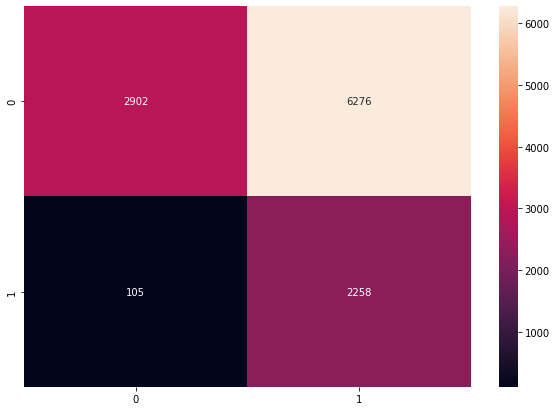

In [190]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(df["airline_sentiment"].tolist(), df['Text_Blob_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- Comparing the accuracies of Unsupervised Learning methods VADER and TextBlob

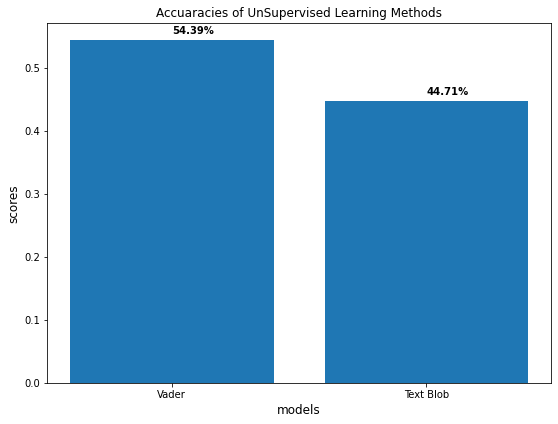

In [191]:
#plot the accuaracies of the text blob and Vader
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Vader', 'Text Blob']
# calculation accuracies of Vader and Textblob models using accuracy_score metrics
scores = [accuracy_score(df["airline_sentiment"].tolist(),df["VADER_pred"].tolist()),accuracy_score(df["airline_sentiment"].tolist(),df["Text_Blob_pred"].tolist())]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)   # y-axis labels
ax.set_xlabel('models',fontsize= 12)   # x-axis labels
ax.set_title('Accuaracies of UnSupervised Learning Methods')   #tittle of the graph
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

- Here, Vader works better than Text Blob because VADER generally works better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage.

In [192]:
def check_scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class)) 
  print() 

  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(lr_recall, lr_precision)
  ax1.set(xlabel="Recall", ylabel="Precision")

  plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  print()
  print('Are under Precision-Recall curve:', lr_f1)
  
  fpr, tpr, _ = roc_curve(y_test, test_probs)


  ax2.plot(fpr, tpr)
  ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

  print("Area under ROC-AUC:", lr_auc)
  return train_accuracy, test_accuracy, train_auc, test_auc



def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                      param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

In [193]:
# Creating object of TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(df.cleaned_tweet)
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, df['airline_sentiment'], random_state=42)

In [198]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Checking other ML models 

# Using Base SVM model with TF-IDF

Train confusion matrix is: 
[[6824   31]
 [ 151 1649]]

Test confusion matrix is: 
[[2291   32]
 [ 296  267]]

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      2323
           1       0.89      0.47      0.62       563

    accuracy                           0.89      2886
   macro avg       0.89      0.73      0.78      2886
weighted avg       0.89      0.89      0.87      2886


Train accuracy score:  0.9789716926632005
Test accuracy score:  0.8863478863478863

Train ROC-AUC score:  0.9969059080962801
Test ROC-AUC score:  0.9291370792805591

Are under Precision-Recall curve: 0.6194895591647333
Area under ROC-AUC: 0.8049648667387744


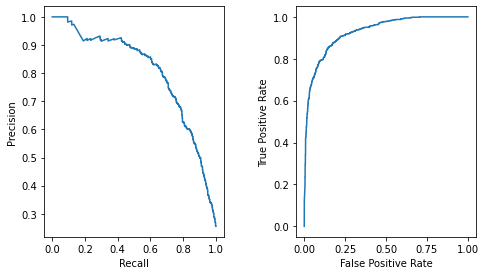

In [196]:
SVM = svm.SVC( probability=True)
s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc = check_scores(SVM,x_train, x_test, y_train, y_test)

# Adaboost

Train confusion matrix is: 
[[6655  200]
 [1012  788]]

Test confusion matrix is: 
[[2251   72]
 [ 328  235]]

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2323
           1       0.77      0.42      0.54       563

    accuracy                           0.86      2886
   macro avg       0.82      0.69      0.73      2886
weighted avg       0.85      0.86      0.84      2886


Train accuracy score:  0.8599653379549393
Test accuracy score:  0.8613998613998614

Train ROC-AUC score:  0.8689482940270687
Test ROC-AUC score:  0.8373803091947158

Are under Precision-Recall curve: 0.5402298850574713
Area under ROC-AUC: 0.6298876361965743


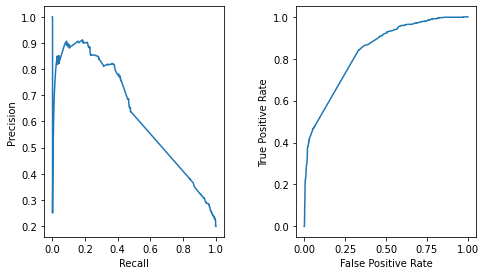

In [199]:

a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc=check_scores(AdaBoostClassifier(),x_train,x_test, y_train, y_test)

#Conclusions
The below are the takeaway points from the above case study

- Exploratory Data Analysis: The word cloud was used to check negative and positive tweets. Distributions of airline sentiments and airlines we ploted
- The tweet was cleaned before it was used in the final ML models
- Working on Encoding text data using Count Vectorizer and TF-IDF and
- classifying them using Machine learning models.
- Working on Unsupervised learning methods using Python packages for Sentiment - Analysis like VADER sentiment analysis and TextBlob.
- Comparing the Machine learning models' performance with Sentiment Analysis - - using Python packages to check which one gave better and more accurate results.
- Overall the TDIF, SVM TF-DIF and Adaboost models had a better prediction